# New Section

In [ ]:
#import the data from Drive

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
file_path = '/content/drive/MyDrive/complaints.csv'
if os.path.exists(file_path):
  df = pd.read_csv(file_path)
  print("DataFrame loaded successfully.")
else:
  print(f"File not found at {file_path}")
  print("Please make sure 'complaints.csv' is in the root of your 'My Drive' folder.")

Mounted at /content/drive


<ipython-input-1-586099695d1d>:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


DataFrame loaded successfully.


In [2]:
print(df.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [3]:
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Analyze distribution of complaints
print(df['Product'].value_counts())

  Date received                                            Product  \
0    2025-05-10                                    Debt collection   
1    2025-05-09  Credit reporting or other personal consumer re...   
2    2025-05-09  Credit reporting or other personal consumer re...   
3    2025-05-08  Credit reporting or other personal consumer re...   
4    2025-05-09  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit card debt                              Communication tactics   
1  Credit reporting                        Improper use of your report   
2  Credit reporting               Incorrect information on your report   
3  Credit reporting  Problem with a company's investigation into an...   
4  Credit reporting                        Improper use of your report   

                                           Sub-issue  \
0  You told them to stop contacting you, but they...   
1  Credit inquiries on

In [4]:
print(df)

        Date received                                            Product  \
0          2025-05-10                                    Debt collection   
1          2025-05-09  Credit reporting or other personal consumer re...   
2          2025-05-09  Credit reporting or other personal consumer re...   
3          2025-05-08  Credit reporting or other personal consumer re...   
4          2025-05-09  Credit reporting or other personal consumer re...   
...               ...                                                ...   
9404042    2016-09-08                                   Credit reporting   
9404043    2022-06-06  Credit reporting, credit repair services, or o...   
9404044    2016-07-14                                   Credit reporting   
9404045    2014-03-03                                   Credit reporting   
9404046    2014-11-10                                   Credit reporting   

              Sub-product                                              Issue  \
0      

In [5]:
#EDA (Exploratory Data Analysis) & Feature Engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404047 entries, 0 to 9404046
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

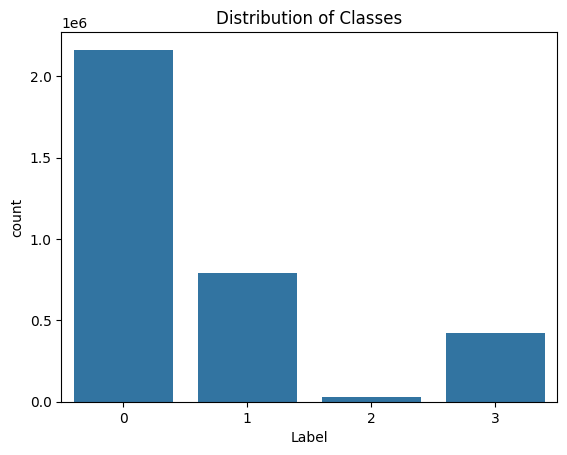

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# View basic info
print(df.info())
print(df['Product'].value_counts())

# Filter dataset for the 4 target categories only
categories = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]
df = df[df['Product'].isin(categories)].copy()

# Map categories to numbers
label_map = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df['Label'] = df['Product'].map(label_map)

# Plot distribution
sns.countplot(data=df, x='Label')
plt.title('Distribution of Classes')
plt.show()


In [7]:
#Text Preprocessing


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Text'] = df['Consumer complaint narrative'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
#Model Selection (TF-IDF + Multiple Classifiers)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Cleaned_Text']
y = df['Label']

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_vec = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}


In [13]:
#Model Comparison

In [17]:
from sklearn.metrics import accuracy_score

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Naive Bayes Accuracy: 0.7257
Logistic Regression Accuracy: 0.9376
SVM Accuracy: 0.7378


                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.72      0.98      0.83    433311
                                                             Debt collection       0.86      0.34      0.48    157278
                                                               Consumer Loan       0.65      0.11      0.18      6355
                                                                    Mortgage       0.92      0.29      0.44     84106

                                                                    accuracy                           0.74    681050
                                                                   macro avg       0.79      0.43      0.48    681050
                                                                weighted avg       0.77      0.74      0.69    681050



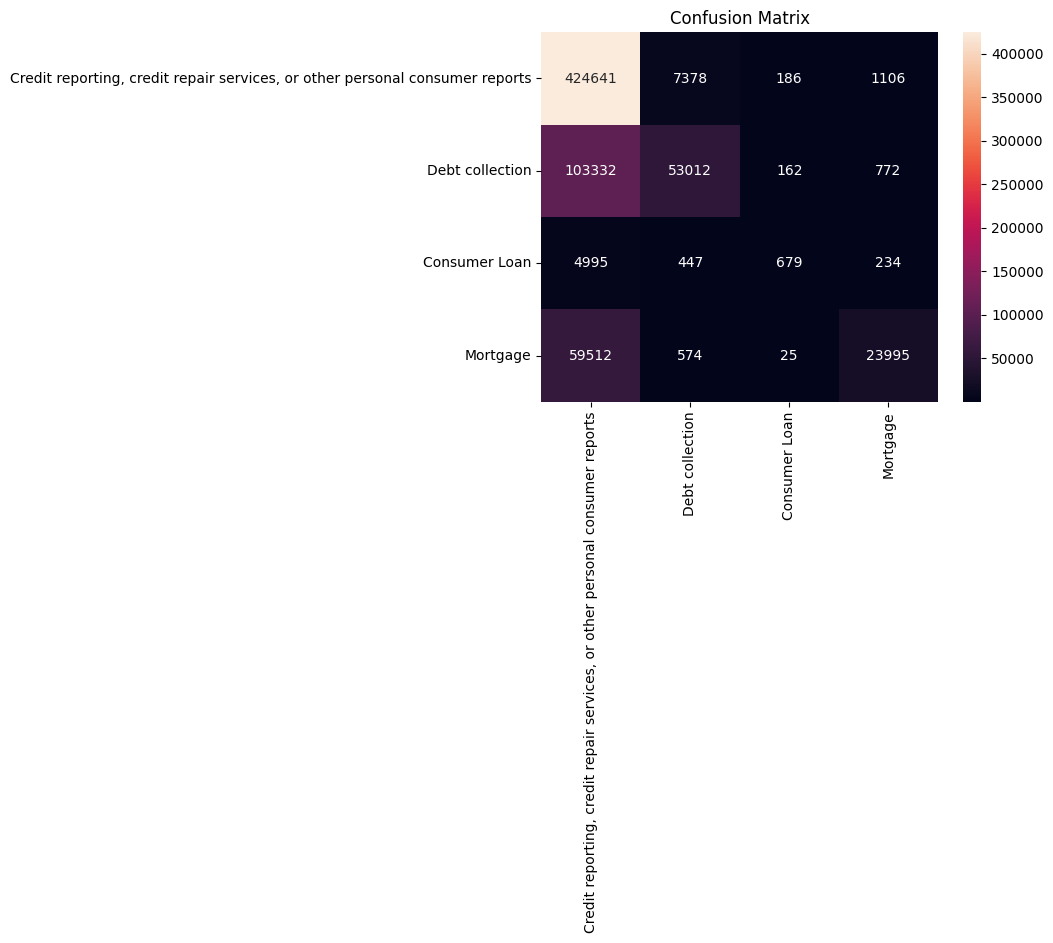

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_map.keys()))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.show()



In [19]:
def predict_complaint(text):
    cleaned = preprocess(text)
    vector = tfidf.transform([cleaned])
    pred = best_model.predict(vector)[0]
    category = [k for k, v in label_map.items() if v == pred][0]
    return category

# Example
example_text = "The mortgage company wrongly reported me to credit bureau"
print(predict_complaint(example_text))


Credit reporting, credit repair services, or other personal consumer reports


In [21]:
example_text = "Dealing with your lender or servicer"
print(predict_complaint(example_text))

Mortgage
